# Analysis on Keywords

I used Python to clean and analyze the given data from August 1st to August 14 that was seperated by 2 periods that lasted 1 week each. Below are the steps I've taken to do that. 


# Loading and Cleaning the Data

In [63]:
# Importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [4]:
# Loading data as seperate files for easier analysis 
period_1_data = pd.read_excel("dataset.xlsx", sheet_name="Period 1")
period_2_data = pd.read_excel("dataset.xlsx", sheet_name="Period 2")

In [5]:
# Confirming correct amount of rows for both periods 
display(period_1_data)
display(period_2_data)

,Keyword Tracking ID,Impressions,Clicks,Redirects,Revenue,Cost,Average Rank
0,11517280,55636,2091,941,286.25,896.24,1.0
1,759180135,4772,510,707,272.62,195.85,2.6
2,17339668,5713,191,271,115.72,84.09,5.1
3,17307586,26129,121,241,107.12,71.06,4.8
4,338384029,24837,115,232,97.67,67.71,4.3
...,...,...,...,...,...,...,...
9994,117440386,21,0,0,0.00,0.00,6.3
9995,61481664,3,0,0,0.00,0.00,2.3
9996,77917304,12,0,0,0.00,0.00,5.1
9997,82284988,15,0,0,0.00,0.00,7.4


,Keyword Tracking ID,Impressions,Clicks,Redirects,Revenue,Cost,Average Rank
0,715228753,1529,68,81,31.51,16.41,2.2
1,11046219,916,3,0,0.00,1.27,3.4
2,17018864,197,0,0,0.00,0.00,5.8
3,343363497,22,0,0,0.00,0.00,7.5
4,181891096,1,0,0,0.00,0.00,1.6
...,...,...,...,...,...,...,...
9994,872384,1,0,0,0.00,0.00,2.4
9995,338783786,11,0,0,0.00,0.00,5.0
9996,339231999,9,0,0,0.00,0.00,4.1
9997,712777888,40,0,0,0.00,0.00,7.9


In [6]:
# Checking data types
print(period_1_data.dtypes)
print(period_2_data.dtypes)

Keyword Tracking ID      int64
Impressions              int64
Clicks                   int64
Redirects                int64
Revenue                float64
Cost                   float64
Average Rank           float64
dtype: object
Keyword Tracking ID      int64
Impressions              int64
Clicks                   int64
Redirects                int64
Revenue                float64
Cost                   float64
Average Rank           float64
dtype: object


# Preparing the Data
When aggregating the data, some rows for the metrics below contained Null or NaN(Not a Number):<br> 
 1. CPC
 2. Profit_Margins
 3. RR
 4. RPR
 5. RPC

I've chosen to keep the NaN values as opposed to replacing them with 0's to show that the calculation wasn't able to perform due to a missing value such as if their were no clicks.<br>
<br>
With the exception to Profit_Margins, I'd chosen to replace negative values with 0 since we already have an indicator if an keyword is unprofitable from the 'Profit' column that will show a negative value.

In [52]:
# Checking for any null & NaN values
print(period_1_data.isnull().sum())
print(period_2_data.isnull().sum())

Keyword_ID          0
Impressions         0
Clicks              0
Redirects           0
Revenue             0
Cost                0
Average_Rank        0
CTR                 0
CPC              6878
Profit              0
Profit_Margin       0
RR               6878
RPR              7760
RPC              6878
dtype: int64
Keyword_ID          0
Impressions         0
Clicks              0
Redirects           0
Revenue             0
Cost                0
Average_Rank        0
CTR                 4
CPC              6884
Profit              0
Profit_Margin       0
RR               6884
RPR              7801
RPC              6884
dtype: int64


In [8]:
# Creating a function to calculate the Data Points given from Assignment
def prepare_data(df):
    df = df.rename(columns={
            'Keyword Tracking ID': 'Keyword_ID',
            "Average Rank": "Average_Rank"
        })
            
    df['CTR'] = df['Clicks'] / df['Impressions'] 
    df['CPC'] = df['Cost'] / df['Clicks'] 
    df['Profit'] = df['Revenue'] - df['Cost'] 
    df['Profit_Margin'] = df['Profit'] / df['Revenue']
    df['RR'] = df['Redirects'] / df['Clicks']
    df['RPR'] = df['Revenue'] / df['Redirects']
    df['RPC'] = df['Revenue'] / df['Clicks']

    # Replace NaN and inf with 0
    df['Profit_Margin'] = df['Profit_Margin'].replace([np.inf, -np.inf, np.nan], 0)
    # Reorganize columns
    df = df.loc[:, [
            'Keyword_ID', 'Impressions', 'Clicks', 'Redirects', 'Revenue', 'Cost', 
            'Average_Rank', 'CTR', 'CPC', 'Profit', 'Profit_Margin', 'RR','RPR', 'RPC'
    ]]
    
    return df

In [9]:
# Checking if loaded correctly
period_1_data = prepare_data(period_1_data)
period_2_data = prepare_data(period_2_data)
display(period_1_data.head())
display(period_2_data.head())

,Keyword_ID,Impressions,Clicks,Redirects,Revenue,Cost,Average_Rank,CTR,CPC,Profit,Profit_Margin,RR,RPR,RPC
0,11517280,55636,2091,941,286.25,896.24,1.0,0.037584,0.428618,-609.99,-2.130969,0.450024,0.304198,0.136896
1,759180135,4772,510,707,272.62,195.85,2.6,0.106873,0.384020,76.77,0.281601,1.386275,0.385601,0.534549
2,17339668,5713,191,271,115.72,84.09,5.1,0.033433,0.440262,31.63,0.273332,1.418848,0.427011,0.605864
3,17307586,26129,121,241,107.12,71.06,4.8,0.004631,0.587273,36.06,0.336632,1.991736,0.444481,0.885289
4,338384029,24837,115,232,97.67,67.71,4.3,0.004630,0.588783,29.96,0.306747,2.017391,0.420991,0.849304


,Keyword_ID,Impressions,Clicks,Redirects,Revenue,Cost,Average_Rank,CTR,CPC,Profit,Profit_Margin,RR,RPR,RPC
0,715228753,1529,68,81,31.51,16.41,2.2,0.044474,0.241324,15.10,0.479213,1.191176,0.389012,0.463382
1,11046219,916,3,0,0.00,1.27,3.4,0.003275,0.423333,-1.27,0.000000,0.000000,NaN,0.000000
2,17018864,197,0,0,0.00,0.00,5.8,0.000000,NaN,0.00,0.000000,NaN,NaN,NaN
3,343363497,22,0,0,0.00,0.00,7.5,0.000000,NaN,0.00,0.000000,NaN,NaN,NaN
4,181891096,1,0,0,0.00,0.00,1.6,0.000000,NaN,0.00,0.000000,NaN,NaN,NaN


In [10]:
print(period_1_data['Revenue'].sum().round(2))
print(period_1_data['Cost'].sum().round(2))
print(period_1_data['Profit'].sum().round(2))

print(period_1_data['Impressions'].sum().round(2))
print(period_1_data['Clicks'].sum().round(2))

print(period_1_data['CTR'].mean().round(2))
print(period_1_data['RR'].mean().round(2))
print(period_1_data['RPR'].mean().round(2))
print(period_1_data['CPC'].mean().round(2))
print(period_1_data['RPC'].mean().round(2)) 
print(period_2_data['Revenue'].sum().round(2))
print(period_2_data['Cost'].sum().round(2))
print(period_2_data['Profit'].sum().round(2))

print(period_2_data['Impressions'].sum().round(2))
print(period_2_data['Clicks'].sum().round(2))

print(period_2_data['CTR'].mean().round(2))
print(period_2_data['RR'].mean().round(2))
print(period_2_data['RPR'].mean().round(2))
print(period_2_data['CPC'].mean().round(2))
print(period_2_data['RPC'].mean().round(2)) 

8365.66
6723.43
1642.23
2031117
24424
0.02
0.89
0.36
0.22
0.32
10126.57
8376.6
1749.97
2323941
29079
0.02
0.79
0.43
0.26
0.33


In [11]:
print(period_2_data['Revenue'].sum().round(2))
print(period_2_data['Cost'].sum().round(2))
print(period_2_data['Profit'].sum().round(2))

print(period_2_data['Impressions'].sum().round(2))
print(period_2_data['Clicks'].sum().round(2))

print(period_2_data['CTR'].mean().round(2))
print(period_2_data['RR'].mean().round(2))
print(period_2_data['RPR'].mean().round(2))
print(period_2_data['CPC'].mean().round(2))
print(period_2_data['RPC'].mean().round(2)) 

10126.57
8376.6
1749.97
2323941
29079
0.02
0.79
0.43
0.26
0.33


In [12]:
# Show the top 20 profitable keywords based on the 'Profit' column
display(period_1_data[period_1_data['Profit'] > 0].sort_values(by='Profit',ascending=False).head(20))

display(period_2_data[period_1_data['Profit'] > 0].sort_values(by='Profit',ascending=False).head(20))

,Keyword_ID,Impressions,Clicks,Redirects,Revenue,Cost,Average_Rank,CTR,CPC,Profit,Profit_Margin,RR,RPR,RPC
1,759180135,4772,510,707,272.62,195.85,2.6,0.106873,0.384020,76.77,0.281601,1.386275,0.385601,0.534549
6,82406778,9088,133,234,83.33,45.85,4.8,0.014635,0.344737,37.48,0.449778,1.759398,0.356111,0.626541
10,17035071,1691,45,145,60.59,23.60,5.8,0.026611,0.524444,36.99,0.610497,3.222222,0.417862,1.346444
3,17307586,26129,121,241,107.12,71.06,4.8,0.004631,0.587273,36.06,0.336632,1.991736,0.444481,0.885289
2,17339668,5713,191,271,115.72,84.09,5.1,0.033433,0.440262,31.63,0.273332,1.418848,0.427011,0.605864
16,11539661,932,30,152,45.41,14.20,4.7,0.032189,0.473333,31.21,0.687294,5.066667,0.298750,1.513667
4,338384029,24837,115,232,97.67,67.71,4.3,0.004630,0.588783,29.96,0.306747,2.017391,0.420991,0.849304
12,14709906,9523,45,116,55.18,26.81,5.0,0.004725,0.595778,28.37,0.514136,2.577778,0.475690,1.226222
7,181056209,1551,55,51,76.14,48.80,1.2,0.035461,0.887273,27.34,0.359075,0.927273,1.492941,1.384364
9,17701152,4326,84,153,66.35,41.50,5.5,0.019417,0.494048,24.85,0.374529,1.821429,0.433660,0.789881


,Keyword_ID,Impressions,Clicks,Redirects,Revenue,Cost,Average_Rank,CTR,CPC,Profit,Profit_Margin,RR,RPR,RPC
2032,759185698,231,33,86,28.67,8.66,2.4,0.142857,0.262424,20.01,0.697942,2.606061,0.333372,0.868788
1277,758949554,2334,11,58,20.03,6.27,4.6,0.004713,0.570000,13.76,0.686970,5.272727,0.345345,1.820909
1129,11533086,1680,72,101,31.23,18.63,2.6,0.042857,0.258750,12.60,0.403458,1.402778,0.309208,0.433750
1845,14709906,10527,58,99,50.32,39.06,3.9,0.005510,0.673448,11.26,0.223768,1.706897,0.508283,0.867586
24,14708404,4633,64,87,37.78,26.90,4.2,0.013814,0.420312,10.88,0.287983,1.359375,0.434253,0.590313
520,20614800,197,21,33,13.50,6.23,3.8,0.106599,0.296667,7.27,0.538519,1.571429,0.409091,0.642857
1323,26676626,416,8,20,9.74,2.54,3.5,0.019231,0.317500,7.20,0.739220,2.500000,0.487000,1.217500
1803,11029865,2617,21,36,15.80,8.88,3.5,0.008024,0.422857,6.92,0.437975,1.714286,0.438889,0.752381
432,338708175,455,29,45,18.88,12.08,3.6,0.063736,0.416552,6.80,0.360169,1.551724,0.419556,0.651034
283,715576871,782,48,37,19.46,12.82,4.0,0.061381,0.267083,6.64,0.341213,0.770833,0.525946,0.405417


In [13]:
p1_top_profitable_keywords = period_1_data.nlargest(10, 'Profit')
p1_top_unprofitable_keywords = period_1_data.nsmallest(10, 'Profit')

In [14]:
display(p1_top_profitable_keywords)

,Keyword_ID,Impressions,Clicks,Redirects,Revenue,Cost,Average_Rank,CTR,CPC,Profit,Profit_Margin,RR,RPR,RPC
1,759180135,4772,510,707,272.62,195.85,2.6,0.106873,0.384020,76.77,0.281601,1.386275,0.385601,0.534549
6,82406778,9088,133,234,83.33,45.85,4.8,0.014635,0.344737,37.48,0.449778,1.759398,0.356111,0.626541
10,17035071,1691,45,145,60.59,23.60,5.8,0.026611,0.524444,36.99,0.610497,3.222222,0.417862,1.346444
3,17307586,26129,121,241,107.12,71.06,4.8,0.004631,0.587273,36.06,0.336632,1.991736,0.444481,0.885289
2,17339668,5713,191,271,115.72,84.09,5.1,0.033433,0.440262,31.63,0.273332,1.418848,0.427011,0.605864
16,11539661,932,30,152,45.41,14.20,4.7,0.032189,0.473333,31.21,0.687294,5.066667,0.298750,1.513667
4,338384029,24837,115,232,97.67,67.71,4.3,0.004630,0.588783,29.96,0.306747,2.017391,0.420991,0.849304
12,14709906,9523,45,116,55.18,26.81,5.0,0.004725,0.595778,28.37,0.514136,2.577778,0.475690,1.226222
7,181056209,1551,55,51,76.14,48.80,1.2,0.035461,0.887273,27.34,0.359075,0.927273,1.492941,1.384364
9,17701152,4326,84,153,66.35,41.50,5.5,0.019417,0.494048,24.85,0.374529,1.821429,0.433660,0.789881


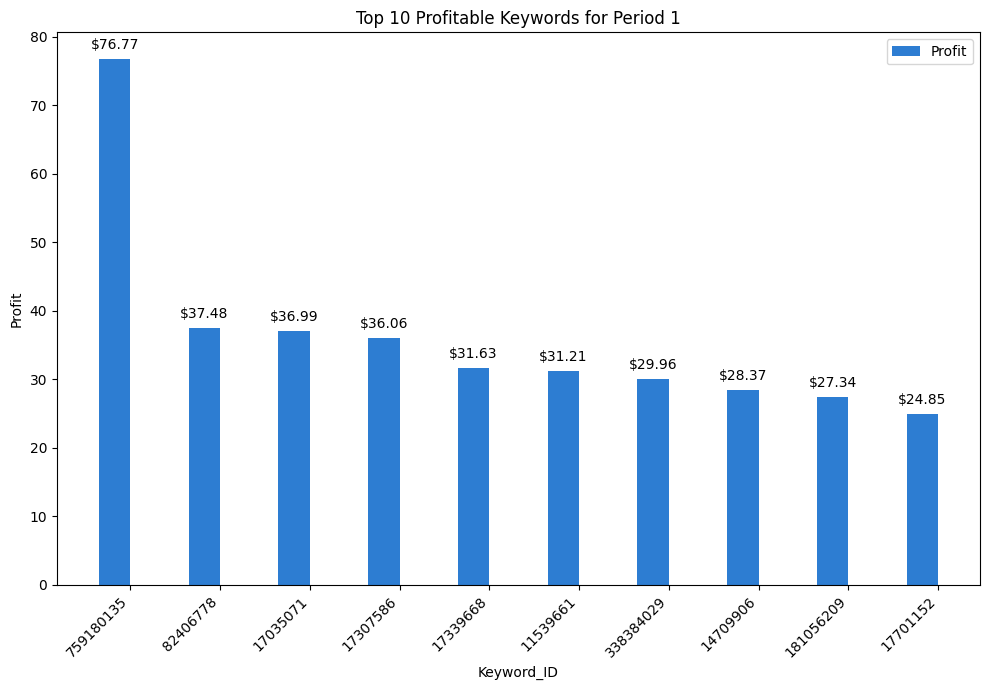

In [ ]:
# Plotting the top 10 profitable keywords for period 1
bar_width = 0.35
index = np.arange(len(p1_top_profitable_keywords['Keyword_ID']))

# Define colors based on whether each individual profit value is positive or negative
colors_p1 = ['#2D7DD2' if val > 0 else 'red' for val in p1_top_profitable_keywords['Profit']]

fig, ax = plt.subplots(figsize=(10, 7))
bar1 = ax.bar(index, p1_top_profitable_keywords['Profit'], bar_width, label='Profit', color=colors_p1)

ax.set_xlabel('Keyword_ID')
ax.set_ylabel('Profit')
ax.set_title('Top 10 Profitable Keywords for Period 1')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(p1_top_profitable_keywords['Keyword_ID'], rotation=45, ha="right")
ax.legend()

for bar in bar1:
    height = bar.get_height()
    ax.annotate(
        f'${height:.2f}', 
        xy=(bar.get_x() + bar.get_width() / 2, height),  
        xytext=(0, 5),  
        textcoords="offset points",
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()

In [16]:
display(period_1_data[period_1_data['Profit'] < 0].sort_values(by='Profit',ascending=True).head(20))

,Keyword_ID,Impressions,Clicks,Redirects,Revenue,Cost,Average_Rank,CTR,CPC,Profit,Profit_Margin,RR,RPR,RPC
0,11517280,55636,2091,941,286.25,896.24,1.0,0.037584,0.428618,-609.99,-2.130969,0.450024,0.304198,0.136896
285,16834679,20293,28,14,6.58,15.73,6.0,0.001380,0.561786,-9.15,-1.390578,0.500000,0.470000,0.235000
341,870556,7498,25,12,5.58,11.62,3.4,0.003334,0.464800,-6.04,-1.082437,0.480000,0.465000,0.223200
486,223540534,4644,15,10,3.84,9.01,4.5,0.003230,0.600667,-5.17,-1.346354,0.666667,0.384000,0.256000
342,25247638,967,22,10,5.48,9.67,3.8,0.022751,0.439545,-4.19,-0.764599,0.454545,0.548000,0.249091
556,11533106,1943,24,8,3.35,7.39,6.0,0.012352,0.307917,-4.04,-1.205970,0.333333,0.418750,0.139583
160,487851585,1113,40,28,11.01,15.01,5.1,0.035939,0.375250,-4.00,-0.363306,0.700000,0.393214,0.275250
822,28315147,570,16,4,1.90,5.58,6.9,0.028070,0.348750,-3.68,-1.936842,0.250000,0.475000,0.118750
538,25493722,1107,15,11,3.49,6.98,4.8,0.013550,0.465333,-3.49,-1.000000,0.733333,0.317273,0.232667
303,487175329,175,20,12,6.18,9.53,1.9,0.114286,0.476500,-3.35,-0.542071,0.600000,0.515000,0.309000


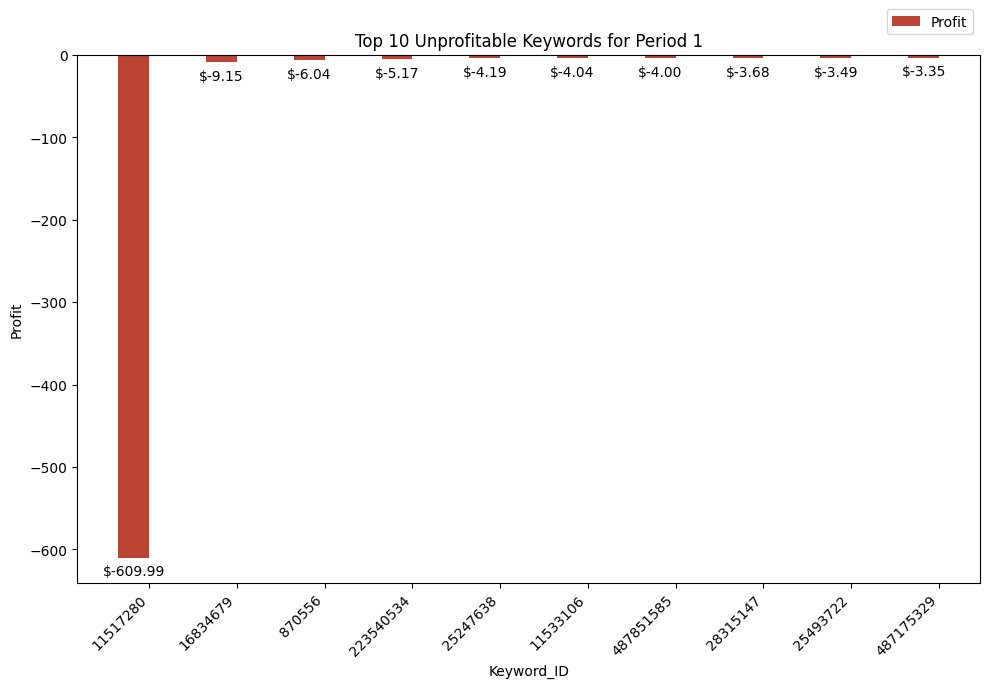

In [ ]:
# Plotting the top 10 unprofitable keywords for period 1
bar_width = 0.35
index = np.arange(len(p1_top_unprofitable_keywords['Keyword_ID']))

# Define colors based on whether each individual profit value is positive or negative
colors_p1 = ['#41463D' if val > 0 else '#BB4435' for val in p1_top_unprofitable_keywords['Profit']]

fig, ax = plt.subplots(figsize=(10, 7))
bar1 = ax.bar(index, p1_top_unprofitable_keywords['Profit'], bar_width, label='Profit', color=colors_p1)

ax.set_xlabel('Keyword_ID')
ax.set_ylabel('Profit')
ax.set_title('Top 10 Unprofitable Keywords for Period 1')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(p1_top_unprofitable_keywords['Keyword_ID'], rotation=45, ha="right")
ax.legend()

ax.legend(bbox_to_anchor=(1, 1.1), loc='upper right')  

for bar in bar1:
    height = bar.get_height()
    ax.annotate(
        f'${height:.2f}', 
        xy=(bar.get_x() + bar.get_width() / 2, height),  
        xytext=(0, -15),  
        textcoords="offset points",
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()

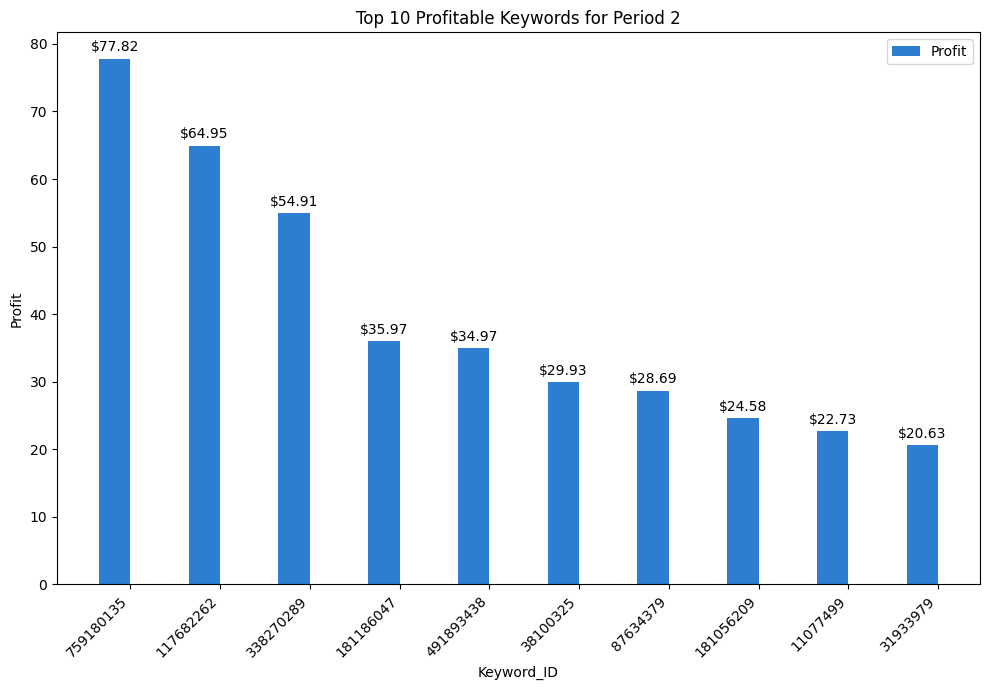

In [ ]:
# Plotting the top 10 profitable keywords for period 2
p2_top_profitable_keywords = period_2_data.nlargest(10, 'Profit')

bar_width = 0.35
index = np.arange(len(p2_top_profitable_keywords['Keyword_ID']))

# Define colors based on whether each individual profit value is positive or negative
colors_p1 = ['#2D7DD2' if val > 0 else 'red' for val in p2_top_profitable_keywords['Profit']]

fig, ax = plt.subplots(figsize=(10, 7))
bar1 = ax.bar(index, p2_top_profitable_keywords['Profit'], bar_width, label='Profit', color=colors_p1)

ax.set_xlabel('Keyword_ID')
ax.set_ylabel('Profit')
ax.set_title('Top 10 Profitable Keywords for Period 2')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(p2_top_profitable_keywords['Keyword_ID'], rotation=45, ha="right")
ax.legend()

for bar in bar1:
    height = bar.get_height()
    ax.annotate(
        f'${height:.2f}', 
        xy=(bar.get_x() + bar.get_width() / 2, height),  
        xytext=(0, 3),  
        textcoords="offset points",
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()

# Merging the 2 data sets
I merged the two dataframes based on if they shared the same Keyword_ID to compare if any changes were made and the impact of it. No new keywords were introduced in period 2.

<br> Looking at gross profit, we've seen a positive increase of $107.74.

<br> 1881 keywords were profitable comparing to the 1st period. 

In [18]:
# Merging on 'Keyword_ID' to align data from both DataFrames
merged_df = pd.merge(period_1_data, period_2_data, on='Keyword_ID', suffixes=('_p1', '_p2'))

In [ ]:
# Confirming correct amount of rows for each data frame
print(len(period_1_data))
print(len(period_2_data))
print(len(merged_df))

9999
9999
9999


In [19]:
summary_sum_p1 = merged_df[['Revenue_p1', 'Cost_p1', 'Profit_p1', 'Impressions_p1', 'Clicks_p1']].agg(['sum'])
summary_sum_p2 = merged_df[['Revenue_p2', 'Cost_p2', 'Profit_p2', 'Impressions_p2', 'Clicks_p2']].agg(['sum'])

# Rename columns to indicate the period
summary_sum_p1.columns = [f"{col}" for col in summary_sum_p1.columns]
summary_sum_p2.columns = [f"{col}" for col in summary_sum_p2.columns]

# Concatenate the summaries side-by-side for easy comparison
comparison_summary_1 = pd.concat([summary_sum_p1, summary_sum_p2], axis=1)

# Reorder columns to show each metric side by side for easy comparison
comparison_summary_1 = comparison_summary_1[[ 
    'Revenue_p1', 'Revenue_p2', 
    'Cost_p1', 'Cost_p2', 
    'Profit_p1', 'Profit_p2', 
    'Impressions_p1', 'Impressions_p2', 
    'Clicks_p1', 'Clicks_p2'
]]
comparison_summary_1 = comparison_summary_1.round(2)

print(comparison_summary_1)

     Revenue_p1  Revenue_p2  Cost_p1  Cost_p2  Profit_p1  Profit_p2  \
sum     8365.66    10126.57  6723.43   8376.6    1642.23    1749.97   

     Impressions_p1  Impressions_p2  Clicks_p1  Clicks_p2  
sum         2031117         2323941      24424      29079  


In [20]:
print(merged_df['Revenue_p2'].sum() - merged_df['Revenue_p1'].sum())
print(merged_df['Cost_p2'].sum() - merged_df['Cost_p1'].sum())
print(merged_df['Profit_p2'].sum() - merged_df['Profit_p1'].sum())
print(merged_df['Impressions_p2'].sum() - merged_df['Impressions_p1'].sum())
print(merged_df['Clicks_p2'].sum() - merged_df['Clicks_p1'].sum())

1760.9099999999999
1653.1699999999983
107.74000000000001
292824
4655


### Summary of Revenue, Cost, Profit, Impressions, and Clicks 
Revenue increased by $1,760.91 <br>
Cost increased by $1,653.17 <br>
Profit increased by $107.74<br>
Impressions increased by 292,824<br>
Clicks increased by 4,655<br>
<br> Every metric seemed to increase so to better compare the change from the previous period I compared the growth rate between the revenue and cost. The growth rates are as follows:

Revenue Growth Rate: 21.05%<br>
Cost Growth Rate: 24.59%<br>
<br>This indicates that the cost has increased at a slightly higher rate than revenue, which could impact profitability.

In [51]:
summary_mean_p1 = merged_df[['RR_p1', 'RPR_p1', 'CTR_p1', 'CPC_p1', 'RPC_p1']].agg(['mean'])
summary_mean_p2 = merged_df[['RR_p2', 'RPR_p2', 'CTR_p2', 'CPC_p2', 'RPC_p2']].agg(['mean'])

# Rename columns to indicate the period
summary_mean_p1.columns = [f"{col}" for col in summary_mean_p1.columns]
summary_mean_p2.columns = [f"{col}" for col in summary_mean_p2.columns]

# Concatenate the summaries side-by-side for easy comparison
comparison_summary_2 = pd.concat([summary_mean_p1, summary_mean_p2], axis=1)

# Reorder columns to show each metric side by side for easy comparison
comparison_summary_2 = comparison_summary_2[[ 
    'RR_p1', 'RR_p2', 
    'RPR_p1', 'RPR_p2',
    'CTR_p1', 'CTR_p2', 
    'CPC_p1', 'CPC_p2', 
    'RPC_p1', 'RPC_p2'
]]
comparison_summary_2 = comparison_summary_2.round(2)

print(comparison_summary_2)

      RR_p1  RR_p2  RPR_p1  RPR_p2  CTR_p1  CTR_p2  CPC_p1  CPC_p2  RPC_p1  \
mean   0.89   0.79    0.36    0.43    0.02    0.02    0.22    0.26    0.32   

      RPC_p2  
mean    0.33  


### Summary of RR, RPR, CPC, and RPC
I took the mean of RR, RPR, CPC, and RPC and compared the two periods. <br>
<br> I found that CPC went up by .04 but RPC went up by .01 meaning we are spending more on each click but the revenue is not increasing at the same rate.<br>
<br> Notably our RPR went up by .07 and our RR was lowered by .10. While the redirect rate is lower, the quality of and expenditure per redirect is better. 


In [ ]:
print(merged_df['RR_p2'].mean() - merged_df['RR_p1'].mean())
print(merged_df['RPR_p2'].mean() - merged_df['RPR_p1'].mean())
print(merged_df['CTR_p2'].mean() - merged_df['CTR_p1'].mean())
print(merged_df['CPC_p2'].mean() - merged_df['CPC_p1'].mean())
print(merged_df['RPC_p2'].mean() - merged_df['RPC_p1'].mean())

-0.10565424874877949
0.06784096263280193
2.89523800547295e-05
0.04334187016401514
0.011079861225898269


In [ ]:
# Calculate profit difference
merged_df['Profit_Difference'] = (merged_df['Profit_p2'] - merged_df['Profit_p1']).round(2)

# Show only rows where there was a positive difference in Profit
profit_diff = merged_df[merged_df['Profit_Difference'] > 0]

In [ ]:
# Checking profitable keywords
row_count = len(profit_diff)

print(f'The DataFrame has {row_count} rows.')

The DataFrame has 1881 rows.


In [54]:
display(merged_df['Redirects_p1'].sum())

22414

In [55]:
display(merged_df['Redirects_p2'].sum())

23768

In [ ]:

# Extracting desired columns for analysis
merged_summary_df = merged_df[['Keyword_ID','Impressions_p1','Impressions_p2','Clicks_p1','Clicks_p2','Redirects_p1','Redirects_p2','Revenue_p1','Revenue_p2','Cost_p1','Cost_p2','Profit_p1','Profit_p2']]

# Calculate profit difference
merged_summary_df['Profit_Difference'] = (merged_summary_df['Profit_p2'] - merged_summary_df['Profit_p1']).round(2)

# Show only rows where there was a positive difference in Profit
profit_diffs = merged_summary_df[merged_summary_df['Profit_Difference'] > 0]

C:\Users\Tan\AppData\Local\Temp\ipykernel_21524\3210994406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_summary_df['Profit_Difference'] = (merged_summary_df['Profit_p2'] - merged_summary_df['Profit_p1']).round(2)


In [25]:
# display(profit_diffs.sort_values(by='Profit_Difference', ascending=False).head(20))

# Visualizing the Findings From Both Periods
The biggest difference in profit was keyword '11517280', although technically, its still a costly keyword that is still costing us 120 dollars instead of generating profit for us. I've decided to seperate this from the top 10 keywords relative to profitability as this is an outlier. I will show the change for this outlier further along this analysis.<br>
The real difference were for keywords 117682262, 338270289, 181186047, and 491893438 that were more than a 30 dollar increase in profit.

In [26]:
top_1_keyword = profit_diffs.nlargest(1, 'Profit_Difference')
top_11_keywords = profit_diffs.nlargest(11, 'Profit_Difference')
top_10_keywords = top_11_keywords.iloc[1:]

In [47]:
display(top_10_keywords)

,Keyword_ID,Impressions_p1,Impressions_p2,Clicks_p1,Clicks_p2,Redirects_p1,Redirects_p2,Revenue_p1,Revenue_p2,Cost_p1,Cost_p2,Profit_p1,Profit_p2,Profit_Difference
11,117682262,5315,7163,110,177,169,413,58.14,152.35,47.73,87.40,10.41,64.95,54.54
37,338270289,3746,5481,38,80,37,112,25.59,95.84,19.04,40.93,6.55,54.91,48.36
26,181186047,2732,2584,92,108,80,158,34.25,76.46,32.68,40.49,1.57,35.97,34.40
88,491893438,320,480,32,43,22,57,16.09,49.91,11.13,14.94,4.96,34.97,30.01
167,87634379,450,501,13,15,25,72,10.58,38.03,7.38,9.34,3.20,28.69,25.49
47,38100325,2225,3237,41,68,50,113,22.86,62.77,17.13,32.84,5.73,29.93,24.20
151,223272578,1069,152,32,6,29,46,11.50,22.24,14.08,3.17,-2.58,19.07,21.65
159,487251491,1291,1871,32,62,33,106,11.05,46.49,12.68,27.48,-1.63,19.01,20.64
153,487954014,794,944,26,63,19,63,11.34,38.58,8.12,19.68,3.22,18.90,15.68
141,758949554,3193,2334,27,11,37,58,11.94,20.03,13.77,6.27,-1.83,13.76,15.59


In [60]:
test1 = merged_df[[  
    'Keyword_ID',
    'Impressions_p1', 'Impressions_p2',
    'Clicks_p1', 'Clicks_p2',
    'Profit_p1', 'Profit_p2',
    'Redirects_p1','Redirects_p2',
    'RR_p1', 'RR_p2', 
    'CTR_p1', 'CTR_p2',
    'RPR_p1', 'RPR_p2', 
    'CPC_p1', 'CPC_p2', 
    'RPC_p1', 'RPC_p2',
    'Average_Rank_p1','Average_Rank_p2',  
    'Profit_Difference']]

test1['RR_Difference'] = (test1['RR_p2'] - test1['RR_p1']).round(3)
test1['CTR_Difference'] = (test1['CTR_p2'] - test1['CTR_p1']).round(3)
test2 = test1.nsmallest(50, 'Profit_Difference')

rr_diff = test2[(test2['RR_Difference'] < -1) & (test2['CTR_Difference'] < 0)]

poor_keywords = rr_diff[[
    'Keyword_ID',
    'Impressions_p1', 'Impressions_p2',
    'Clicks_p1', 'Clicks_p2',
    'Profit_p1', 'Profit_p2',
    'Profit_Difference',
    'Redirects_p1','Redirects_p2',
    'RR_p1', 'RR_p2', 
    'RR_Difference',
    'CTR_p1', 'CTR_p2',
    'CTR_Difference',
    'Average_Rank_p1','Average_Rank_p2',  
    ]]

display(poor_keywords)

C:\Users\Tan\AppData\Local\Temp\ipykernel_21524\3637799688.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['RR_Difference'] = (test1['RR_p2'] - test1['RR_p1']).round(3)
C:\Users\Tan\AppData\Local\Temp\ipykernel_21524\3637799688.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['CTR_Difference'] = (test1['CTR_p2'] - test1['CTR_p1']).round(3)


,Keyword_ID,Impressions_p1,Impressions_p2,Clicks_p1,Clicks_p2,Profit_p1,Profit_p2,Profit_Difference,Redirects_p1,Redirects_p2,RR_p1,RR_p2,RR_Difference,CTR_p1,CTR_p2,CTR_Difference,Average_Rank_p1,Average_Rank_p2
16,11539661,932,1395,30,42,31.21,3.71,-27.50,152,80,5.066667,1.904762,-3.162,0.032189,0.030108,-0.002,4.7,3.7
73,11560760,1080,1241,20,20,12.52,-1.54,-14.06,47,12,2.350000,0.600000,-1.750,0.018519,0.016116,-0.002,4.6,4.1
118,759872315,216,331,10,14,9.04,-0.69,-9.73,44,17,4.400000,1.214286,-3.186,0.046296,0.042296,-0.004,3.7,2.7
123,181797761,1132,1661,27,29,8.30,-0.49,-8.79,44,18,1.629630,0.620690,-1.009,0.023852,0.017459,-0.006,2.3,1.8
113,17740825,364,349,11,8,10.06,1.41,-8.65,36,13,3.272727,1.625000,-1.648,0.030220,0.022923,-0.007,6.2,5.1


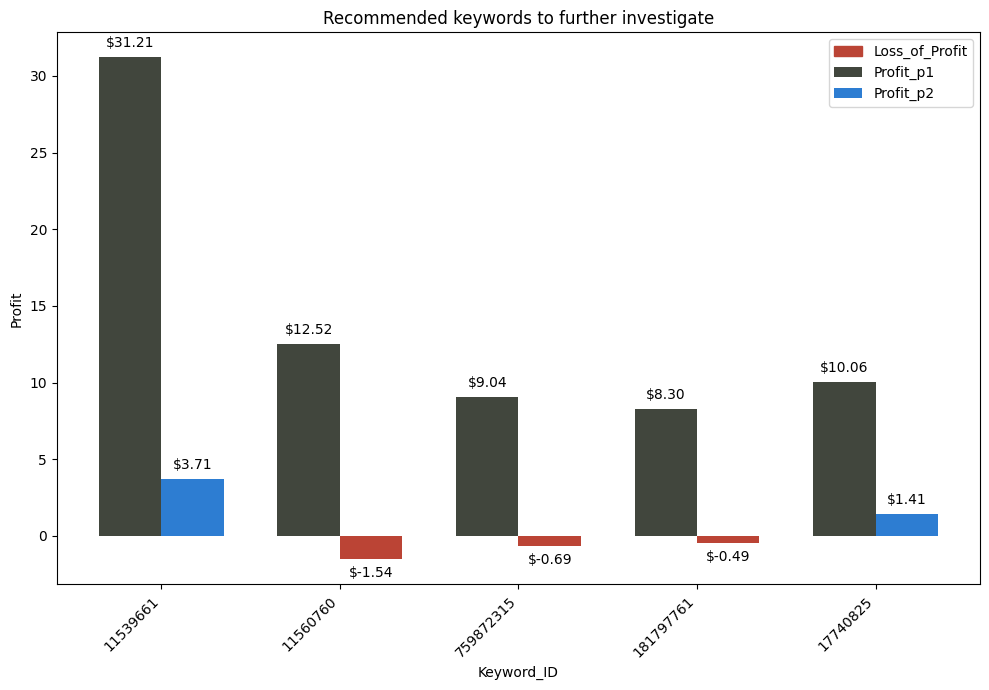

In [ ]:
# Plotting the 5 poor performing keywords
bar_width = 0.35
index = np.arange(len(poor_keywords['Keyword_ID']))

# Define colors based on whether each individual profit value is positive or negative
colors_p1 = ['#41463D' if val > 0 else '#BB4435' for val in poor_keywords['Profit_p1']]
colors_p2 = ['#2D7DD2' if val > 0 else '#BB4435' for val in poor_keywords['Profit_p2']]

fig, ax = plt.subplots(figsize=(10, 7))
bar1 = ax.bar(index, poor_keywords['Profit_p1'], bar_width, label='Profit_p1', color=colors_p1)
bar2 = ax.bar(index + bar_width, poor_keywords['Profit_p2'], bar_width, label='Profit_p2', color=colors_p2)

ax.set_xlabel('Keyword_ID')
ax.set_ylabel('Profit')
ax.set_title('Recommended keywords to further investigate')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(poor_keywords['Keyword_ID'], rotation=45, ha="right")
ax.legend()

for bar in bar1:
    height = bar.get_height()
    ax.annotate(
        f'${height:.2f}', 
        xy=(bar.get_x() + bar.get_width() / 2, height),  
        xytext=(0, 5),  
        textcoords="offset points",
        ha='center', va='bottom', fontsize=10, color='black',
    )

for i, bar in enumerate(bar2):
    height = bar.get_height()
    if i in [1, 2, 3]:
        xytext_offset = (0, -15)
    else:
        xytext_offset = (0, 5)
    
    ax.annotate(
        f'${height:.2f}', 
        xy=(bar.get_x() + bar.get_width() / 2, height),  
        xytext=xytext_offset,
        textcoords="offset points",
        ha='center', va='bottom', fontsize=10, color='black'
    )

profit_loss_patch = mpatches.Patch(color='#BB4435', label='Loss_of_Profit')
ax.legend(handles=[profit_loss_patch, bar1, bar2], loc='best')

plt.tight_layout()
plt.show()

In [28]:
display(top_1_keyword)

,Keyword_ID,Impressions_p1,Impressions_p2,Clicks_p1,Clicks_p2,Redirects_p1,Redirects_p2,Revenue_p1,Revenue_p2,Cost_p1,Cost_p2,Profit_p1,Profit_p2,Profit_Difference
0,11517280,55636,49042,2091,1798,941,1565,286.25,571.31,896.24,691.05,-609.99,-119.74,490.25


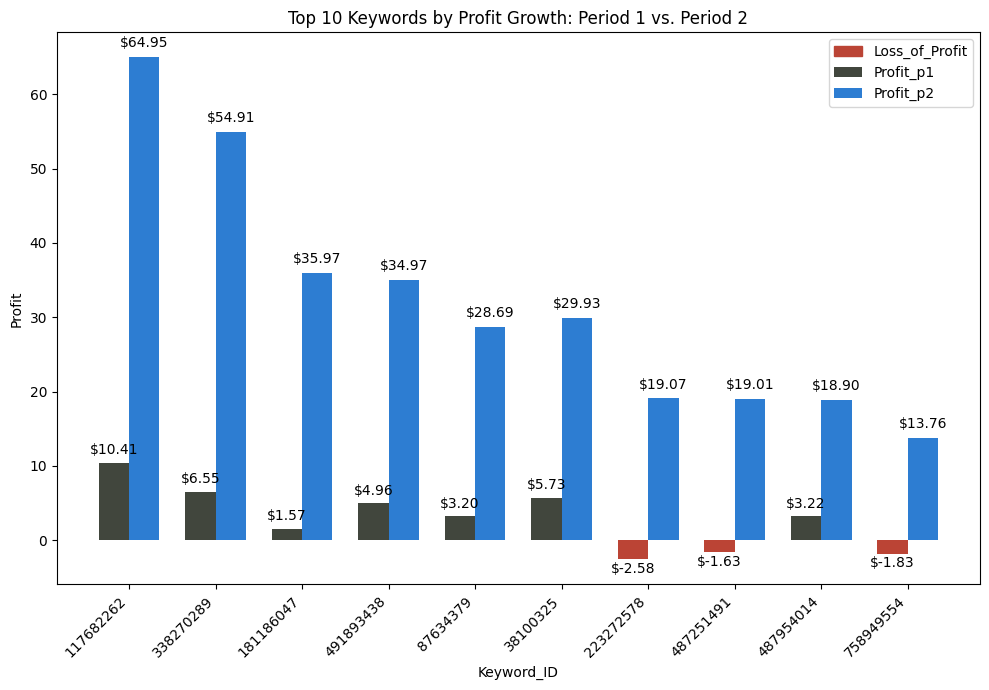

In [ ]:
# Plotting the top 10 profitable keywords comparing period 1 and period 2
bar_width = 0.35
index = np.arange(len(top_10_keywords['Keyword_ID']))

# Define colors based on whether each individual profit value is positive or negative
colors_p1 = ['#41463D' if val > 0 else '#BB4435' for val in top_10_keywords['Profit_p1']]
colors_p2 = ['#2D7DD2' if val > 0 else '#BB4435' for val in top_10_keywords['Profit_p2']]

fig, ax = plt.subplots(figsize=(10, 7))
bar1 = ax.bar(index, top_10_keywords['Profit_p1'], bar_width, label='Profit_p1', color=colors_p1)
bar2 = ax.bar(index + bar_width, top_10_keywords['Profit_p2'], bar_width, label='Profit_p2', color=colors_p2)

ax.set_xlabel('Keyword_ID')
ax.set_ylabel('Profit')
ax.set_title('Top 10 Keywords by Profit Growth: Period 1 vs. Period 2')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_10_keywords['Keyword_ID'], rotation=45, ha="right")
ax.legend()


for i, bar in enumerate(bar1):
    height = bar.get_height()
    if i in [6, 7, 9]:
        xytext_offset = (0, -12)
    else:
        xytext_offset = (0, 4)
    
    ax.annotate(
        f'${height:.2f}', 
        xy=(bar.get_x() + bar.get_width() / 2, height),  
        xytext=xytext_offset,
        textcoords="offset points",
        ha='center', va='bottom', fontsize=10, color='black'
    )

for bar in bar2:
    height = bar.get_height()
    ax.annotate(
        f'${height:.2f}', 
        xy=(bar.get_x() + bar.get_width() / 2, height),  
        xytext=(0, 5), 
        textcoords="offset points",
        ha='center', va='bottom', fontsize=10, color='black'
    )

profit_loss_patch = mpatches.Patch(color='#BB4435', label='Loss_of_Profit')
ax.legend(handles=[profit_loss_patch, bar1, bar2], loc='best')

plt.tight_layout()
plt.show()

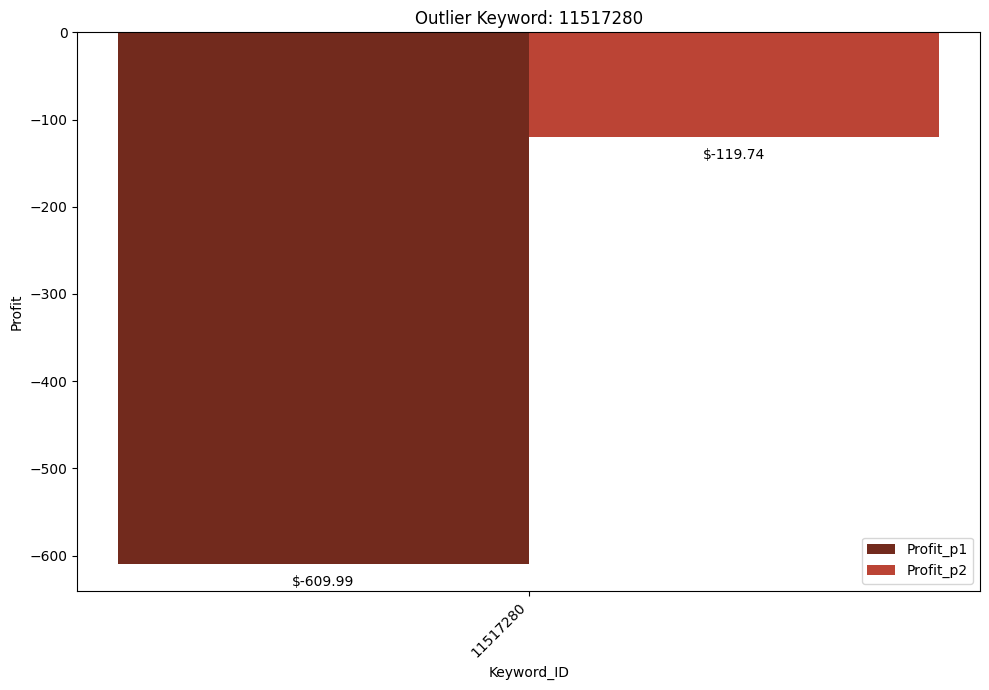

In [ ]:

# Plotting the outlier

bar_width = 0.35
index = np.arange(len(top_1_keyword['Keyword_ID']))

colors_p1 = ['#41463D' if val > 0 else '#722A1D' for val in top_1_keyword['Profit_p1']]
colors_p2 = ['#2D7DD2' if val > 0 else '#BB4435' for val in top_1_keyword['Profit_p2']]

fig, ax = plt.subplots(figsize=(10, 7))
bar1 = ax.bar(index, top_1_keyword['Profit_p1'], bar_width, label='Profit_p1', color=colors_p1)
bar2 = ax.bar(index + bar_width, top_1_keyword['Profit_p2'], bar_width, label='Profit_p2', color=colors_p2)

ax.set_xlabel('Keyword_ID')
ax.set_ylabel('Profit')
ax.set_title('Outlier Keyword: 11517280')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_1_keyword['Keyword_ID'], rotation=45, ha="right")
ax.legend()

for bar in bar1:
    height = bar.get_height()
    ax.annotate(
        f'${height:.2f}', 
        xy=(bar.get_x() + bar.get_width() / 2, height),  
        xytext=(0, -18),  
        textcoords="offset points",
        ha='center', va='bottom', fontsize=10, color='black'
    )

for bar in bar2:
    height = bar.get_height()
    ax.annotate(
        f'${height:.2f}', 
        xy=(bar.get_x() + bar.get_width() / 2, height),  
        xytext=(0, -18), 
        textcoords="offset points",
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()